<a href="https://colab.research.google.com/github/jmarcano101/data110/blob/main/Final_Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd

In [64]:
df = pd.read_csv("/content/netflix_titles_nov_2019.csv.zip")

Netflix Shows and Movies - Exploratory Analysis
The dataset consists of meta details about the movies and tv shows such as the title, director, and cast of the shows / movies. Details such as the release year, the rating, duration etc. As the first step, let's load the dataset, create some new features. In this kernel, I have analysed this dataset to find top insights and findings.

In [65]:
## add new features in the dataset
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added,month_added,season_count
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0,1
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0,
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019.0,11.0,
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019.0,11.0,
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,NaN,2


In [66]:
small = df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
4929,Prelude to War,1942
4931,The Battle of Midway,1942
4946,WWII: Report from the Aleutians,1943
4943,Why We Fight: The Battle of Russia,1943
4941,Undercover: How to Operate Behind Enemy Lines,1943
4936,The Memphis Belle: A Story of a\nFlying Fortress,1944
4938,The Negro Soldier,1944
4940,Tunisian Victory,1944
4923,Know Your Enemy - Japan,1945
4930,San Pietro,1945


Some of the oldest TV Shows on **Netflix**

In [67]:
small = df.sort_values("release_year", ascending = True)
small = small[small['season_count'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
2154,Pioneers: First Women Filmmakers*,1925
5143,Pioneers of African-American Cinema,1946
4593,The Twilight Zone (Original Series),1963
4589,The Andy Griffith Show,1967
4266,Star Trek,1968
2623,Monty Python's Fliegender Zirkus,1972
2624,Monty Python's Flying Circus,1974
3503,Dad's Army,1977
3921,El Chavo,1979
2182,Ninja Hattori,1981


There are movies / shows on the platform which were released way back in 1930s and 40s.


In [68]:
# prompt: Original Release Year of the movies

df['original_release_year'] = df.apply(lambda x : x['release_year'] if x['release_year'] == x['date_added'].year else x['date_added'].year, axis = 1)
df.head()


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added,month_added,season_count,original_release_year
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0,1,2019.0
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0,,2019.0
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019.0,11.0,,2019.0
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019.0,11.0,,2019.0
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,NaN,2,NaN


<Axes: xlabel='year_added'>

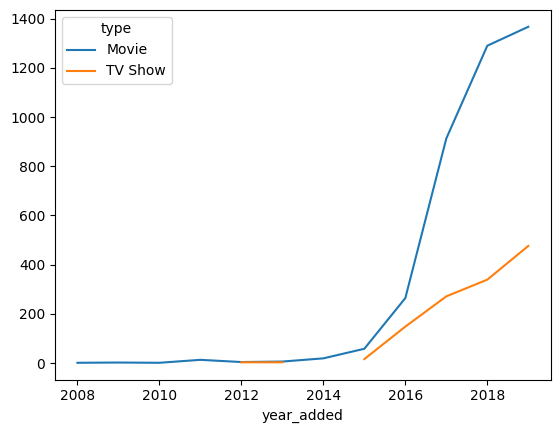

In [69]:
# @title Number of movies and TV shows added per year

df.groupby(['year_added', 'type']).size().unstack().plot(kind='line')

Content from different Countries

<Axes: xlabel='country'>

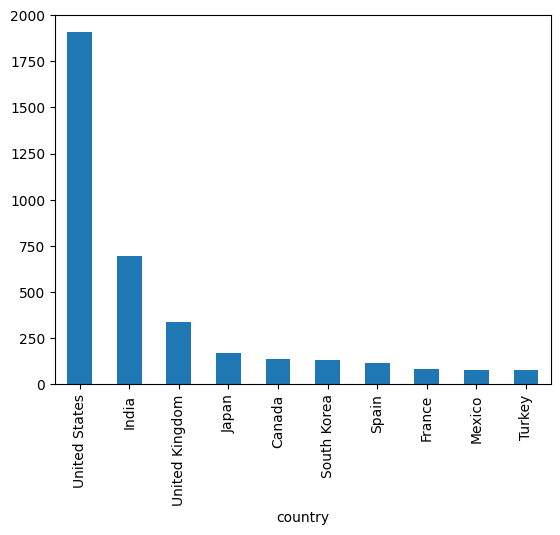

In [70]:
# prompt: Content from different Countries

df.groupby('country').size().sort_values(ascending = False).head(10).plot(kind='bar')


In [71]:
# prompt: TV Shows with many seasons

df.groupby("title")['season_count'].agg('sum').sort_values(ascending=False).head()


title
Forensic Files       9
The Walking Dead     9
The Office (U.S.)    9
Shameless (U.S.)     9
Naruto               9
Name: season_count, dtype: object

In [72]:
# prompt: Distribution of Movie Duration

fig = go.Figure()
fig.add_trace(go.Histogram(x=df[df['type'] == 'Movie']['duration'].astype(int), nbinsx=100))
fig.update_layout(
    title="Distribution of Movie Duration",
    xaxis_title="Duration (minutes)",
    yaxis_title="Count",
)
fig.show()


<Axes: xlabel='listed_in'>

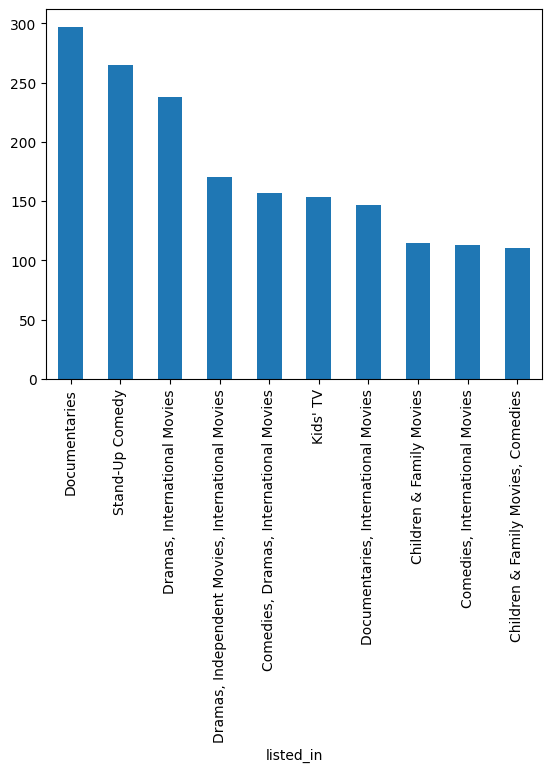

In [73]:
# prompt: What are the top Categories

df.groupby('listed_in').size().sort_values(ascending = False).head(10).plot(kind='bar')


<Axes: title={'center': 'Growth in content over the years'}, xlabel='year_added'>

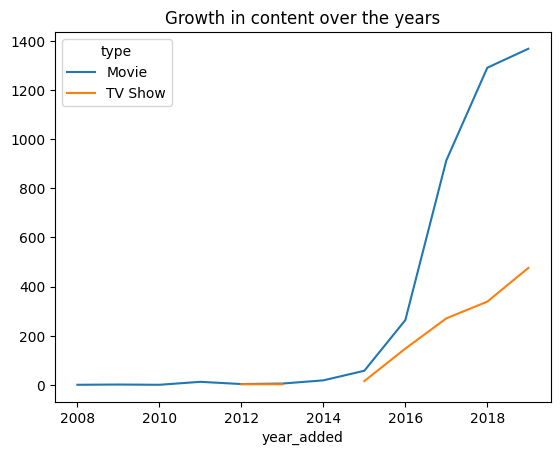

In [74]:
# prompt: Growth in content over the years

df.groupby(['year_added', 'type']).size().unstack().plot(kind='line', title='Growth in content over the years')


In [75]:
small = df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
4929,Prelude to War,1942
4931,The Battle of Midway,1942
4946,WWII: Report from the Aleutians,1943
4943,Why We Fight: The Battle of Russia,1943
4941,Undercover: How to Operate Behind Enemy Lines,1943
4936,The Memphis Belle: A Story of a\nFlying Fortress,1944
4938,The Negro Soldier,1944
4940,Tunisian Victory,1944
4923,Know Your Enemy - Japan,1945
4930,San Pietro,1945


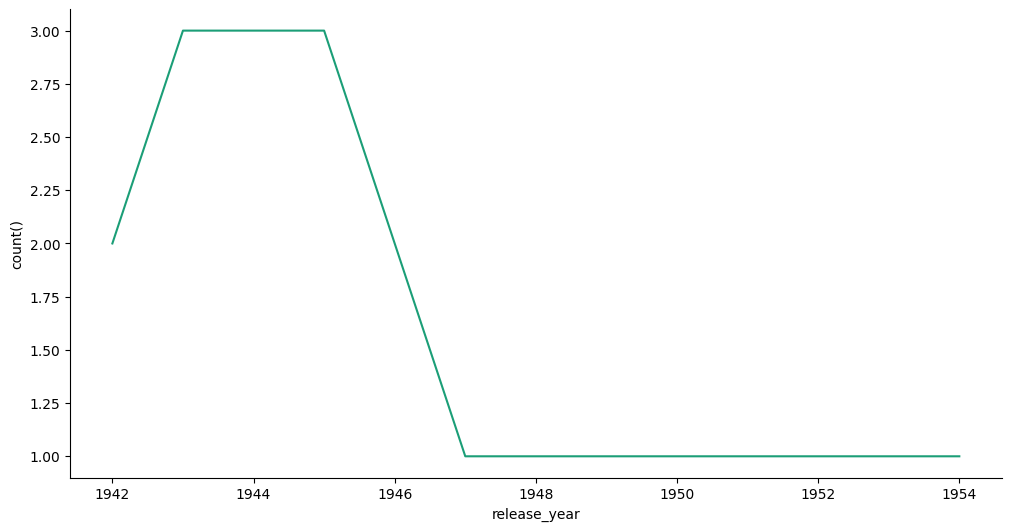

In [76]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['release_year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'release_year'}, axis=1)
              .sort_values('release_year', ascending=True))
  xs = counted['release_year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('release_year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('release_year')
_ = plt.ylabel('count()')

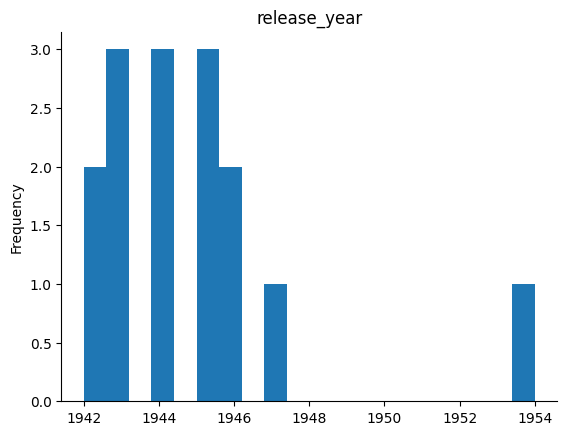

In [77]:
from matplotlib import pyplot as plt
_df_0['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [78]:
# prompt: pie graph

labels = ['Movies', 'TV Shows']
values = [len(df[df['type'] == 'Movie']), len(df[df['type'] == 'TV Show'])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Movie vs TV Show')
fig.show()


Top Actors on Netflix with Most Movies

<Axes: xlabel='cast'>

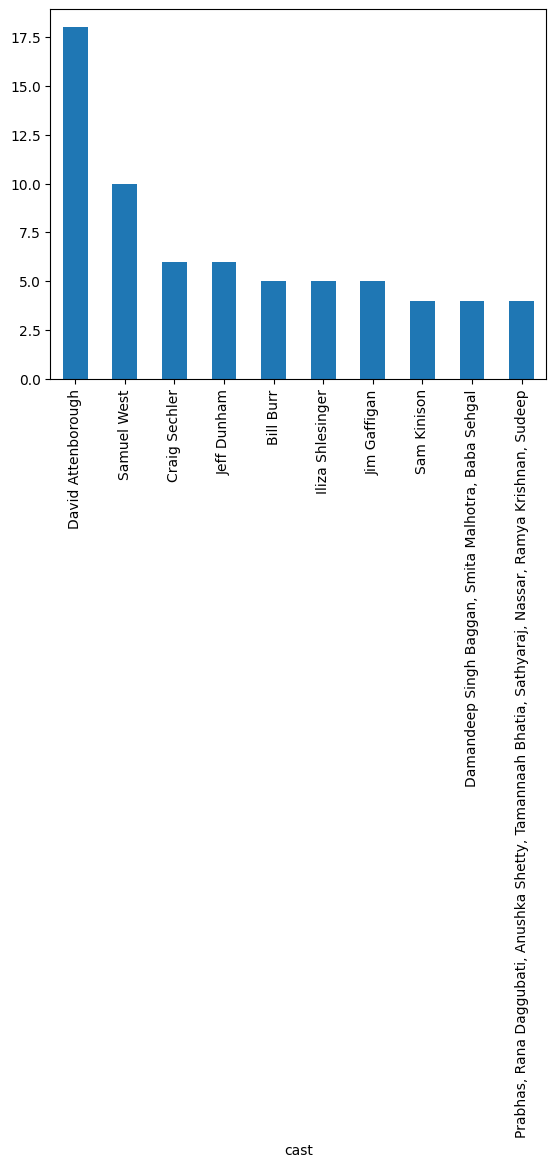

In [79]:
# prompt: op Actors on Netflix with Most Movies

df.groupby('cast').size().sort_values(ascending = False).head(10).plot(kind='bar')


In [80]:
df.country.value_counts()

country
United States                                           1907
India                                                    697
United Kingdom                                           336
Japan                                                    168
Canada                                                   139
                                                        ... 
Norway, Denmark, Netherlands, Sweden                       1
Ireland, United Kingdom, Greece, France, Netherlands       1
Israel, Germany                                            1
Canada, Germany, France, United States                     1
Spain, Mexico, France                                      1
Name: count, Length: 527, dtype: int64

There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
Also, let's consider only the primary genre of the respective movie / TV show.

Text(0.5, 1.0, 'distribution by released year')

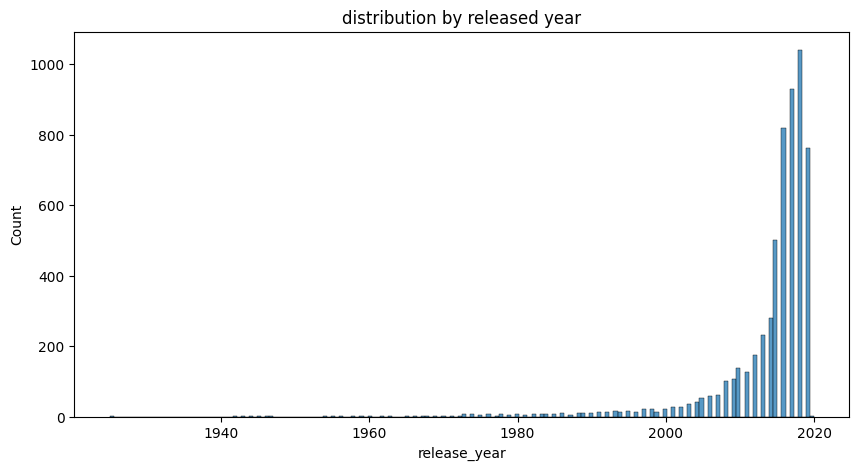

In [81]:
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

Netflix has greater number of new movies / TV shows than the old ones.

Text(0.5, 1.0, 'Top 10 genres')

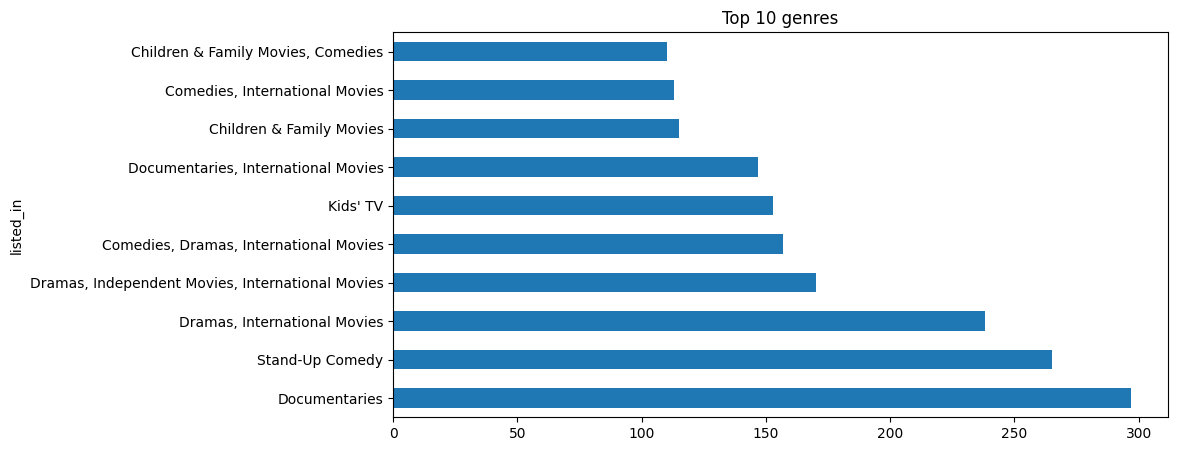

In [82]:
# Top 10 genres
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

In [83]:
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

13.70567072126092

In [84]:
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

30.23813602878191

The dramas is the most popular genre followed by comedies and documentaries.
These three genres account for about 41% of all movies and TV shows.
This value increases to about 82% for top 10 genres.

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

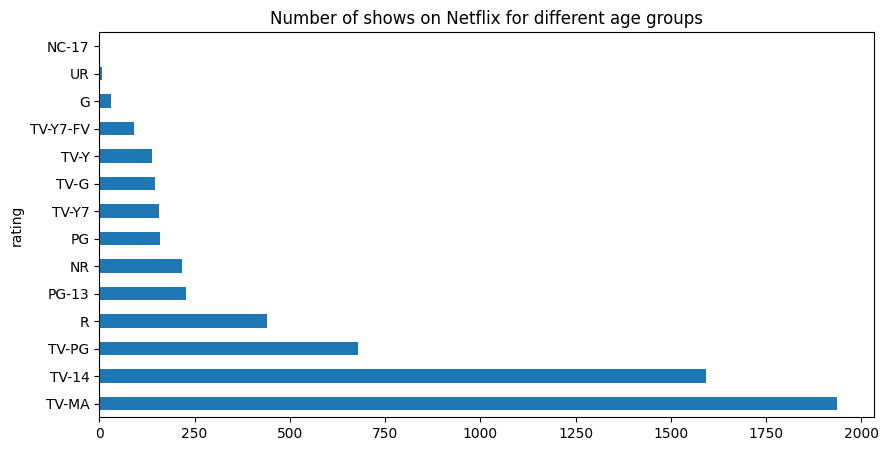

In [85]:
plt.figure(figsize=(10,5))
df.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')

The majority of the shows on Netflix are catered to the needs of adult and young adult population.

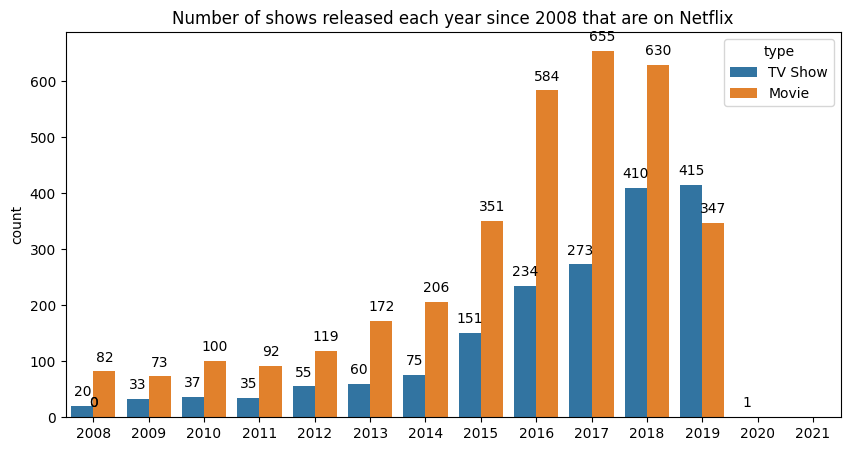

In [86]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Over the years, Netflix has consistently focused on adding more shows in its platform.
Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

In [87]:
df[df['type']== 'Movie'].duration.describe()

count     3939
unique     179
top         90
freq       105
Name: duration, dtype: object

In [88]:
# Movie release year statistics
df[df['type']== 'Movie'].release_year.describe()

count    3939.000000
mean     2012.836507
std         9.289223
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2017.000000
max      2019.000000
Name: release_year, dtype: float64

Text(0.5, 1.0, 'Top 10 genres for movies')

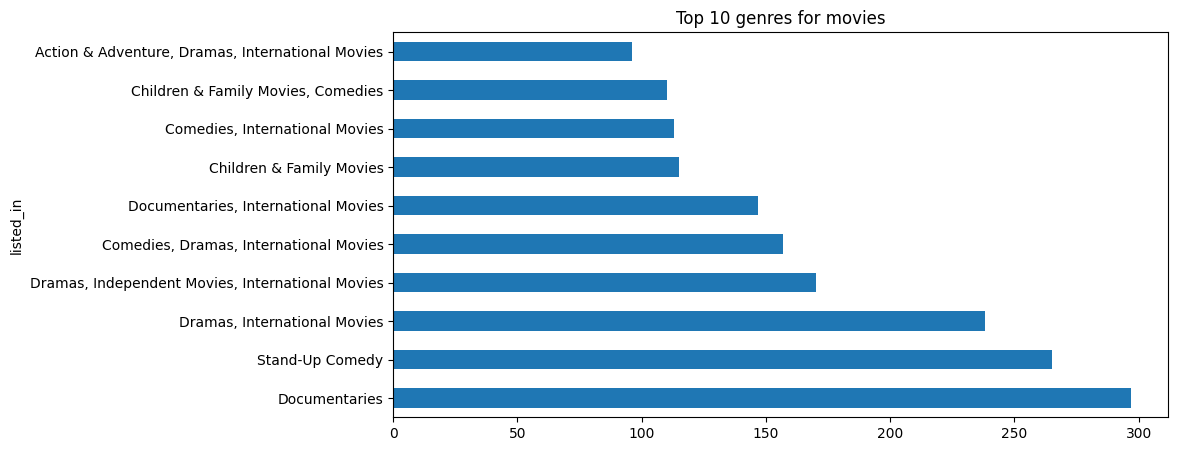

In [89]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

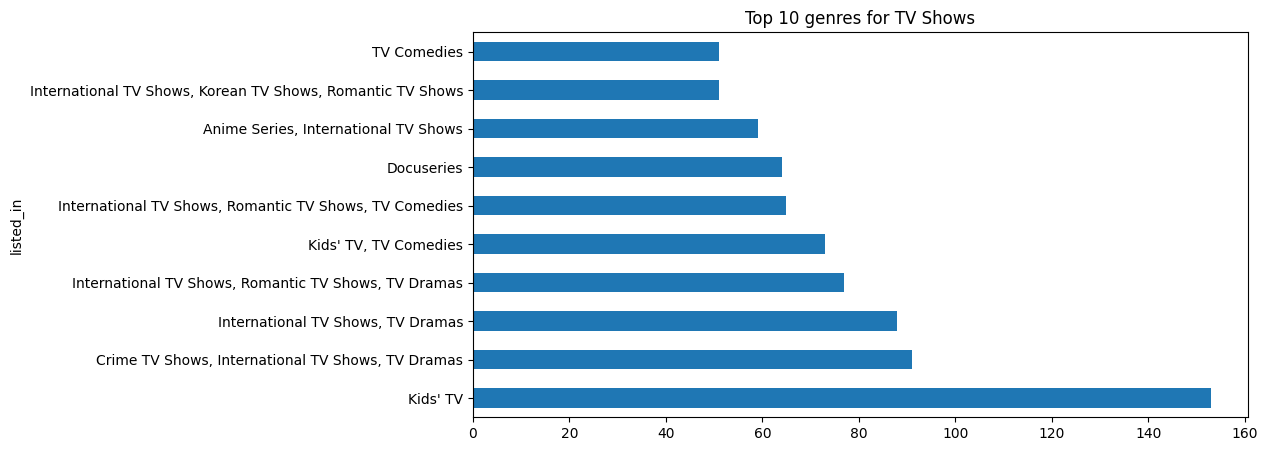

In [90]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

Text(0.5, 1.0, 'Top 10 movie directors')

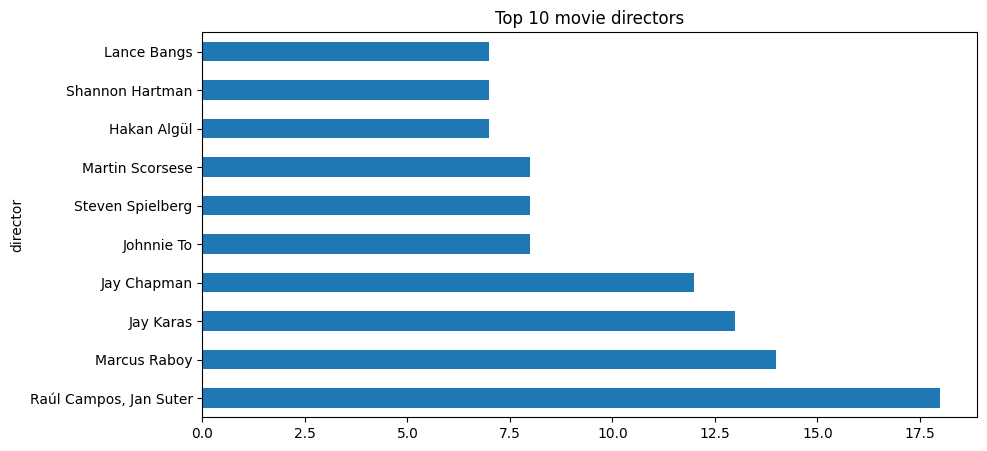

In [91]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

Text(0.5, 1.0, 'Top 10 TV show directors')

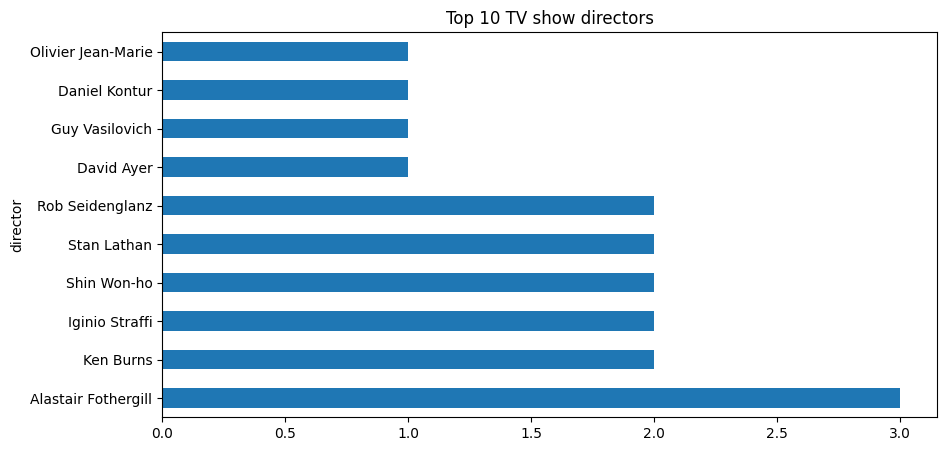

In [92]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')